### mnist 预处理

归一化前y_train
 [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1] 


归一化 y_train: [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1] 


归一化后,独热编码y_train: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 

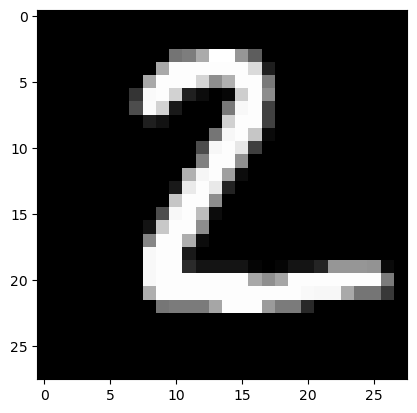

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
(x_train,y_train),(x_test,y_test)=mnist.load_data()
# 归一化
print("归一化前y_train\n",y_train[0:100],"\n")
# 独热编码 
# y_train=to_categorical(y_train,num_classes=10)
# print("\n归一化前,独热编码y_train:",y_train[0:100],"\n")


x_train=x_train/255.0
x_test=x_test/255.0

# y_train=y_train/255.0
# y_test=y_test/255.0

print("\n归一化 y_train:",y_train[0:100],"\n")

y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

print("\n归一化后,独热编码y_train:",y_train[0:100],"\n")
# print(x_test[1],"\n")
# print(y_train[0:100])
import matplotlib.pyplot as plt
plt.imshow(x_test[1],cmap="gray")

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.optimizers import RMSprop

### 搭建 FCN-Net 网络
Flatten - 扁平化层  
Dense - 全连接层

In [5]:
model = Sequential(name="FCN-Net")
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=64,activation="relu"))
model.add(Dense(units=32,activation="relu"))
model.add(Dense(units=32,activation="relu"))
model.add(Dense(units=10,activation="softmax"))
model.summary()

Model: "FCN-Net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 53,706
Trainable params: 53,706
Non-trainable params: 0
_________________________________________________________________


#### 损失()+梯度()

In [6]:
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer=RMSprop())

### 训练 FCN-Net  
model.fit()  
设置 epochs、batch_size、validation_split（指定用于验证的数据比例）  
model_info.history["loss"]

In [7]:
model_info=model.fit(x_train,
          y_train,
          epochs=30,
          batch_size=64,
          validation_split=0.2)
loss, accuracy = model.evaluate(x_test, y_test)
print (accuracy)

Epoch 1/30
750/750 [==============================] - 2s 2ms/step - loss: 0.3947 - accuracy: 0.8842 - val_loss: 0.1809 - val_accuracy: 0.9475
Epoch 2/30
750/750 [==============================] - 1s 2ms/step - loss: 0.1694 - accuracy: 0.9504 - val_loss: 0.1410 - val_accuracy: 0.9581
Epoch 3/30
750/750 [==============================] - 1s 2ms/step - loss: 0.1255 - accuracy: 0.9628 - val_loss: 0.1294 - val_accuracy: 0.9619
Epoch 4/30
750/750 [==============================] - 1s 2ms/step - loss: 0.1020 - accuracy: 0.9700 - val_loss: 0.1231 - val_accuracy: 0.9663
Epoch 5/30
750/750 [==============================] - 1s 2ms/step - loss: 0.0871 - accuracy: 0.9734 - val_loss: 0.1082 - val_accuracy: 0.9696
Epoch 6/30
750/750 [==============================] - 1s 2ms/step - loss: 0.0746 - accuracy: 0.9775 - val_loss: 0.1124 - val_accuracy: 0.9687
Epoch 7/30
750/750 [==============================] - 1s 2ms/step - loss: 0.0650 - accuracy: 0.9804 - val_loss: 0.1065 - val_accuracy: 0.9715
Epoch 

### 保存 FCN-Net

In [6]:
model.save_weights("FCN-Net.h5")

### 绘制 history 曲线

[0.9474999904632568, 0.9580833315849304, 0.9619166851043701, 0.9663333296775818, 0.9695833325386047, 0.968666672706604, 0.9714999794960022, 0.9680833220481873, 0.9711666703224182, 0.968999981880188, 0.9706666469573975, 0.9693333506584167, 0.9722499847412109, 0.9721666574478149, 0.9709166884422302, 0.9714166522026062, 0.9725833535194397, 0.971916675567627, 0.9701666831970215, 0.9678333401679993, 0.9742500185966492, 0.9697499871253967, 0.9706666469573975, 0.9708333611488342, 0.9725000262260437, 0.9706666469573975, 0.9700000286102295, 0.9710000157356262, 0.9667500257492065, 0.9708333611488342]


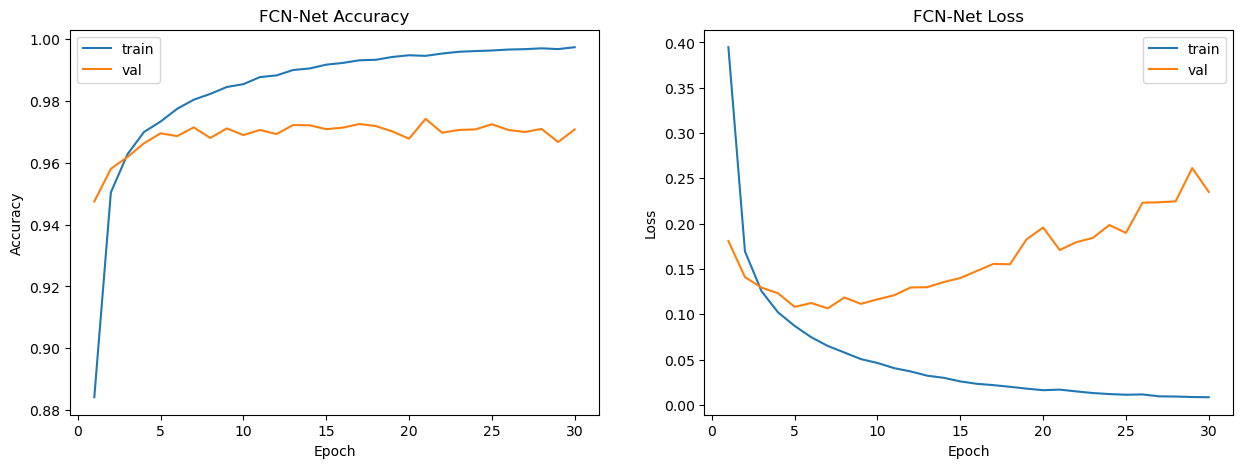

In [8]:
import matplotlib.pyplot as plt
y=model_info.history["val_accuracy"]
print(y)

# 绘图
fig,axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(range(1,len(model_info.history['accuracy'])+1),model_info.history['accuracy'])
axs[0].plot(range(1,len(model_info.history['val_accuracy'])+1),model_info.history['val_accuracy'])
axs[0].set_title("FCN-Net Accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].set_xlabel('Epoch')
axs[0].legend(['train','val'],loc='best')

axs[1].plot(range(1,len(model_info.history['loss'])+1),model_info.history['loss'])
axs[1].plot(range(1,len(model_info.history['val_loss'])+1),model_info.history['val_loss'])
axs[1].set_title("FCN-Net Loss")
axs[1].set_ylabel("Loss")
axs[1].set_xlabel("Epoch")

axs[1].legend(['train','val'],loc='best')
fig.savefig('plot.png')

# plt.xlabel("epoch")
# plt.ylabel("val_accuracy")
# plt.plot(range(0,len(model_info.history["val_accuracy"])),y)

plt.show()

### 在自己的数据集上测试

In [8]:
import numpy as np
import os
import cv2
img_size=28
dataSet_path="./photo"
img_names=os.listdir(dataSet_path)
# print(img_names)

for img_name in img_names:
    img_path=os.path.join(dataSet_path,img_name)
    img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
    print("img_size:",img.shape)
    if img is not None:
        cv2.namedWindow("img_imshow",cv2.WINDOW_AUTOSIZE)
        img=cv2.resize(img,dsize=(28,28))
        print("res-img_size:",img.shape)
        cv2.imshow("img_imshow",mat=img)
        cv2.waitKey()
        cv2.destroyAllWindows()
    else:
        print("img None!")


In [9]:
model.load_weights("D:\\Python\\DP-ML-LING\\FCN-Net\\FCN-Net.h5")
for img_name in img_names:
    img_path=os.path.join(dataSet_path,img_name)    
    img = cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
    cv2.namedWindow("img_imshow",cv2.WINDOW_AUTOSIZE)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,dsize=(28,28))

    cv2.imshow("img_imshow",mat=img)
    cv2.waitKey()
    cv2.destroyAllWindows()

    img=np.reshape(img,(-1,28,28))

    # print(img)

    prediction=model.predict(img)
    inferred_y = np.argmax(prediction, axis=1)
    print(prediction,"\n",inferred_y)


1/1 [==============================] - 0s 79ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]] 
 [8]
1/1 [==============================] - 0s 20ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]] 
 [6]
1/1 [==============================] - 0s 11ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]] 
 [2]
1/1 [==============================] - 0s 19ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]] 
 [2]
1/1 [==============================] - 0s 13ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]] 
 [2]
1/1 [==============================] - 0s 7ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]] 
 [8]
1/1 [==============================] - 0s 12ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]] 
 [1]
1/1 [==============================] - 0s 11ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]] 
 [6]
1/1 [==============================] - 0s 20ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]] 
 [2]
1/1 [==============================] - 0s 6ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]] 
 [2]
1/1 [==============================] - 0s 9ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.